<a href="https://colab.research.google.com/github/rashidmeras/EVA-M6/blob/master/EVA_S4_Assignment1_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVA (M6) Session4 Assignment: The Final Network

Objective:

> Using different networks discussed in Proposal3 explore different techniques and define a Final Network(s) in which the total number of parameters is less than 15K and the validation accuracy is equal to or above 99.4%.


*So let's Start!!*

Install the keras API library

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


From Keras API library following APIs are needed to create a DNN:

* The sequential API allows to create models layer-by-layer
* The Flatten API flattens the input. Does not affect the batch size.
* The Convolution2D API creates a convolution kernel that is convolved with the layer input.
* The np_utils API is used to convert a class vector (integers) to binary class matrix.
* Finally import the MNSIT dataset from Keras

MNIST has a training set of 60,000 examples, and a test set of 10,000 examples.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist


Load the the data, shuffled and split between train and test sets.

>The MNIST dataset consists of pair, “handwritten digit image” and “label”. Digit ranges from 0 to 9, meaning 10 patterns in total.

* handwritten digit image (X_train): This is gray scale image with size 28 x 28 pixel.
* label (y_train): This is actual digit number this handwritten digit image represents. It is the numbers between including 0 to 9.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Matplotlib is a Python 2D plotting library & PyPlot is a shell-like interface to Matplotlib

Display the data in X_train[0] array

(60000, 28, 28)


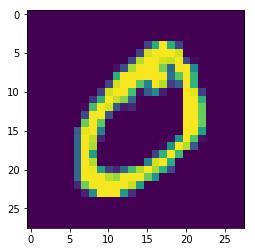

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

Flatten 28x28 images to a 28*28=784 vector for each image.

> The images in the dataset are of 28*28 dimensions which is difficult to accommodate in a simple multilayer neural network. Therefore we need to convert the images into a single dimension where each image contains 784-pixel data using the reshape() function.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The pixel values in the images are in the range of 0 - 255 and in this step we reduce this range even further and normalize it between 0 and 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

label : This is actual digit number this handwritten digit image represents. It is the numbers between including 0 to 9.

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert class vectors to binary class matrices:

> As we can see from above, the output of y_train is an integer from 0 to 9. We need to perform one-hot encoding of the class labels for getting a vector of class integers into a binary matrix. We need to do this to do a “binarization” of the category and so that we can include it as a feature to train the neural network.

We can use the built in np_utils.to_categorical() helper function in keras to do this.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Print the Y_train array after binarization

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Network Type4: Recap 

![NetworkType4](https://rashidmeras.github.io/images/eva/S4_Proposal3_Fig2.png)

The above figure shows Network Type4 that was defined in the previous *Proposal3* where the channels in the layers above Transitional block were reduced to 1/4 th of the original size and the channels of layers below the Transitional block were kept the same. Mentioned below is the performance metrics of this network.

* Total params: **11,336**
* Trainable params: 11,214
* Non-trainable params: 122

>* Score (validation accuracy): **99.28%**


#Various networks so far..

![Channel Size Constarint Types](https://rashidmeras.github.io/images/eva/S4_Proposal3_Table1.png)

Using the technique of constraining the size of the channels in Block1 and Block2 we can see in the above table different variants of this network and its the performance.

In this Final Chapter we make use of **Network Type4** (refer Row No.4) and **Network Type5** (refer Row No.5) and we will push the limits of these networks and observe the performance. 

Inorder to do this we will make use these techniques mentioned below:
1. New optimizer known as SGD [2] [3] along with loss method known as binary_crossentropy.
2. Learning Rate Scheduler [3]





##Network Type 4

In [31]:
from keras.layers import Activation
model = Sequential()

#Layer1: Cov->BN->DO i/p:|28x28x1|Conv(3x3x1)x8| o/p:|26x26x8|
model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False, input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer2: Cov->BN->DO i/p:|26x26x8|Conv(3x3x8)x4| o/p:|24x24x4|
model.add(Convolution2D(4, 3, 3, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer3: Cov->BN->DO i/p:|24x24x4|Conv(3x3x4)x4| o/p:|22x22x4|
model.add(Convolution2D(4, 3, 3, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer4: Cov->BN->DO i/p:|22x22x4|Conv(1x1x4)x3| o/p:|22x22x3|
model.add(Convolution2D(3, 1, 1, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer5: Max-Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2))) #11

#Layer6: Cov->BN->DO i/p:|11x11x3|Conv(3x3x3)x16| o/p:|9x9x16|
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer7: Cov->BN->DO i/p:|9x9x16|Conv(3x3x16)x16| o/p:|7x7x16|
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer8: Cov->BN->DO i/p:|7x7x16|Conv(7x7x16)x10| o/p:|1x1x10|
model.add(Convolution2D(10, 7, 7, use_bias=False)) #1
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer9: Flatten & activation
model.add(Flatten())
model.add(Activation('softmax'))

#Print model summary
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), activation="relu", use_bias=False)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), activation="relu", use_bias=False)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/d

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 4)         288       
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 4)         16        
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 4)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 4)         144       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (7, 7), use_bias=False)`


Compile the model based on following:

* Optimization method: Here we use 'SGD'
* Kind of loss this method will optimize: Here we use 'binary_crossentropy'
* Define a step_decay function that will take the epoch number as input and returns the learning rate

In [0]:
import math
import numpy as np
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler

# fix random seed for reproducibility
seed = 990
np.random.seed(seed)

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
  
model.compile(loss='binary_crossentropy', 
              optimizer=sgd, 
              metrics=['accuracy'])

Start training the model:

* Batch size: set to 128
* Epoch: set to 30

In [38]:
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.0182 - acc: 0.9916 - val_loss: 0.0040 - val_acc: 0.9986
Epoch 2/30
60000/60000 [==============================] - 5s 75us/step - loss: 0.0186 - acc: 0.9913 - val_loss: 0.0048 - val_acc: 0.9984
Epoch 3/30
60000/60000 [==============================] - 4s 75us/step - loss: 0.0183 - acc: 0.9915 - val_loss: 0.0038 - val_acc: 0.9987
Epoch 4/30
60000/60000 [==============================] - 4s 75us/step - loss: 0.0180 - acc: 0.9917 - val_loss: 0.0047 - val_acc: 0.9984
Epoch 5/30
60000/60000 [==============================] - 4s 75us/step - loss: 0.0183 - acc: 0.9916 - val_loss: 0.0044 - val_acc: 0.9984
Epoch 6/30
60000/60000 [==============================] - 5s 75us/step - loss: 0.0181 - acc: 0.9915 - val_loss: 0.0045 - val_acc: 0.9983
Epoch 7/30
60000/60000 [==============================] - 5s 75us/step - loss: 0.0176 - acc: 0.9917 - val_loss: 0.0044 - val_acc

Result (Network Type4):
* Total params: 11,336
* Trainable params: 11,214
* Non-trainable params: 122

>* Score (validation accuracy): **99.9%** at 29th epoch

Analysis (Network Type4):
> The total number of parameters is **11336** and the validation accuracy is **99.9%** 

## Network Type5

> Channel size=1/4 in Block1 and Channel size=1/2 in Block2 (Refer Row No.5 in Table above)

In [41]:
from keras.layers import Activation
model = Sequential()
 
#Layer1: Cov->BN->DO i/p:|28x28x1|Conv(3x3x1)x8| o/p:|26x26x8|  
model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False, input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer2: Cov->BN->DO i/p:|26x26x8|Conv(3x3x8)x4| o/p:|24x24x4|
model.add(Convolution2D(4, 3, 3, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer3: Cov->BN->DO i/p:|24x24x4|Conv(3x3x4)x4| o/p:|22x22x4|
model.add(Convolution2D(4, 3, 3, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer4: Cov->BN->DO i/p:|22x22x4|Conv(1x1x4)x3| o/p:|22x22x3|
model.add(Convolution2D(3, 1, 1, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer5: Max-Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer6: Cov->BN->DO i/p:|11x11x3|Conv(3x3x3)x8| o/p:|9x9x8|
model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer7: Cov->BN->DO i/p:|9x9x8|Conv(3x3x8)x8| o/p:|7x7x8|
model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer8: Cov->BN->DO i/p:|7x7x8|Conv(7x7x8)x10| o/p:|1x1x10|
model.add(Convolution2D(10, 7, 7, use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer9: Flatten & activation
model.add(Flatten())
model.add(Activation('softmax'))

#Print model summary
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), activation="relu", use_bias=False)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), activation="relu", use_bias=False)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/di

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_22 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 4)         288       
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 4)         16        
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 24, 4)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 22, 22, 4)         144       
__________

Print the final score

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer=sgd, 
              metrics=['accuracy'])

In [45]:
model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(step_decay, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 5s 80us/step - loss: 0.0251 - acc: 0.9895 - val_loss: 0.0082 - val_acc: 0.9972
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 5s 77us/step - loss: 0.0254 - acc: 0.9894 - val_loss: 0.0084 - val_acc: 0.9971
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 5s 77us/step - loss: 0.0251 - acc: 0.9895 - val_loss: 0.0074 - val_acc: 0.9974
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 5s 76us/step - loss: 0.0247 - acc: 0.9896 - val_loss: 0.0085 - val_acc: 0.9971
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 5s 76us/step -

Result (Network Type5):
* Total params: 5,408
* Trainable params: 5,318
* Non-trainable params: 90

>* Score (validation accuracy): **99.8%** at 29th epoch

Analysis (Network Type5):
> The total number of parameters is **5408** and the validation accuracy is **99.8%** 

###Summary:

After defining a basic architecture, splitting the layers into blocks, changing the size of the channels at each block level and using the approach of doing Convolution -> Batch-normalization -> Dropout  at each layer and using learning rate scheduler; in this final section we propose two types of networks i.e. Network Type4 and Network Type5 that exhibits best performance.

1. Network Type4: With Total params=11,336 and Validation Accuracy=99.9%
2. Network Type5: With Total params=5,408 and Validation Accuracy=99.8%

Both these networks performed exceptionally well and meets the target requirement.

###Thank you!

References: 

1. [Using Learning Rate Schedules](https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/)
2. [An overview of gradient descent optimization algorithms](http://ruder.io/optimizing-gradient-descent/)
3. [Learning Rate Scheduler and adaptive learning rates](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)